# Notebook es11

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

## 11.1

### Assignment

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Solution

To understand the impact of the three parameters $N_{epochs}$, $N_{train}$ and $\sigma$ in the fit procedure, I repeat the fit estimation with 5 different value for each parameter. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

/Users/giovannichini/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Here, I report the 5 fitting procedure for the 5 different values for $N_{epochs}$. From the model loss trend, it's evident that $N_{epochs}$ must be higher than 30, because the loss function stabilizes after about 30 epochs. The effect on the fit procedure it is shown by the last plot, where it's reported the trend of predicted data. As expected, prediction improves with the increase of $N_{epochs}$.

/Users/giovannichini/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3029 - mse: 0.3029
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mse: 0.0060
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - mse: 0.0011        
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x179e29160> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_do

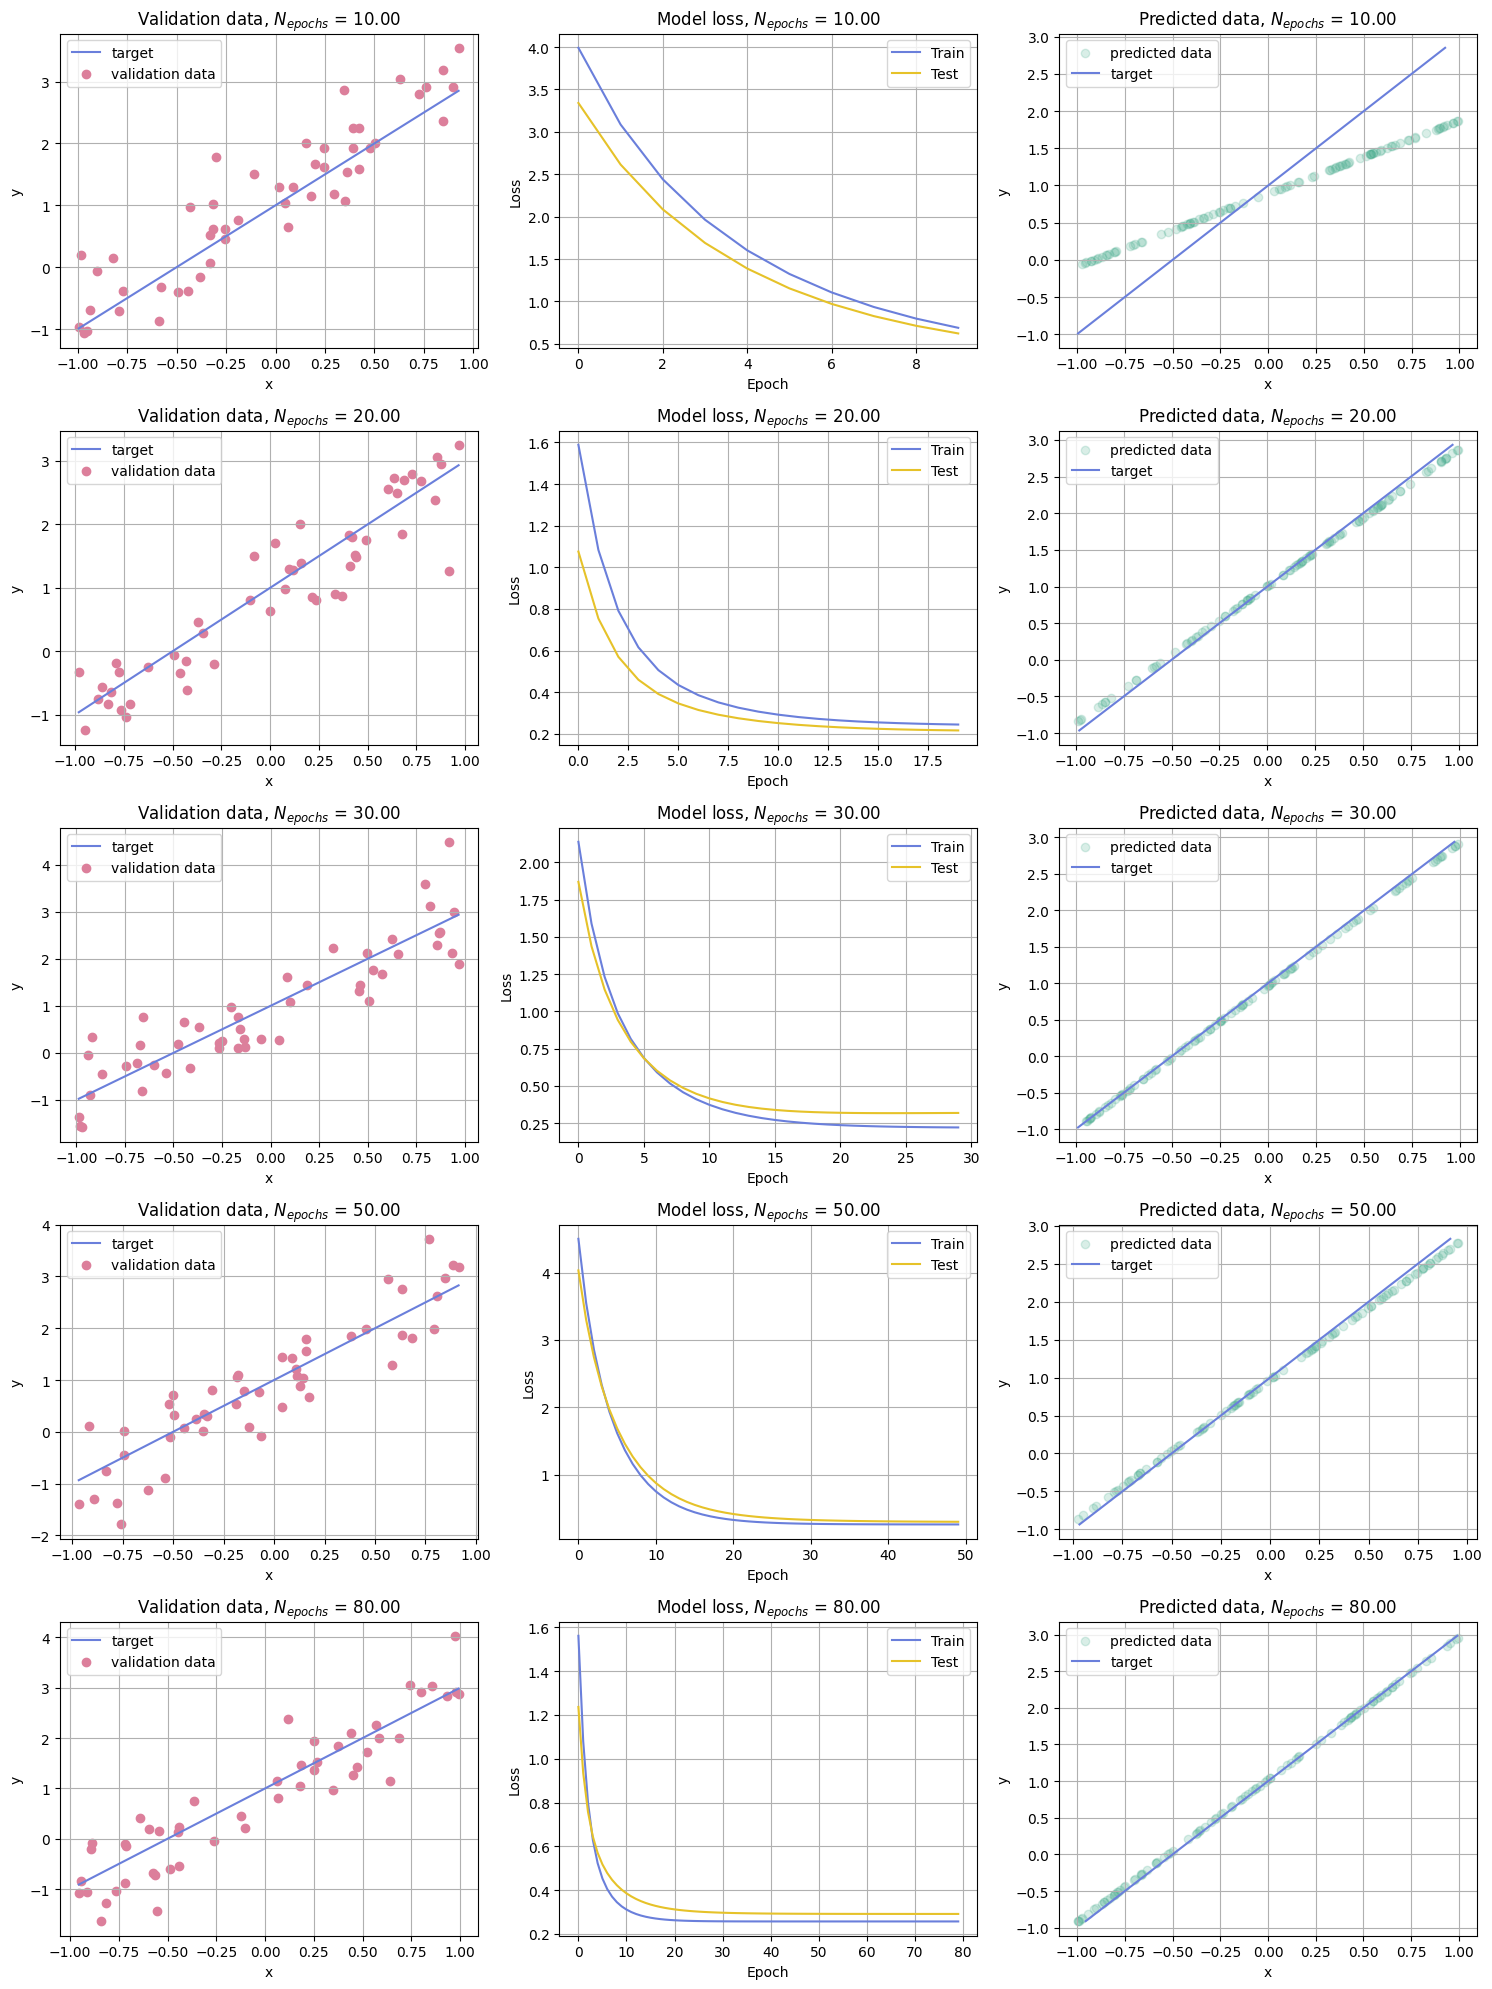

In [2]:
n_exp = 5 #number of experiment 

n_epochs_1 = [10, 20, 30, 50, 80]
fig, ax = plt.subplots(5,3, figsize=(15,20))

for i in range(n_exp):
    
    n_epochs = n_epochs_1[i]
    n_train = 500
    sigma = 0.5

    # generate training inputs
    m = 2 # slope
    b = 1 # intersect
    x_train = np.random.uniform(-1, 1, n_train)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    # generate training imputs with different noise
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    # build the model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # train the model 
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=n_epochs,
        shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

    # evaluate model
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    # plotting data 
    ax[i,0].plot(x_valid, y_target, color='#6A7FDB',label='target')
    ax[i,0].scatter(x_valid, y_valid, color='#DC7F9B', label='validation data')
    ax[i,0].legend()
    ax[i,0].grid(True)
    ax[i,0].set_title(r'Validation data, $N_{epochs}$ = %.2f' % n_epochs)
    ax[i,0].set_xlabel('x')
    ax[i,0].set_ylabel('y')
                       
    ax[i,1].plot(history.history['loss'], color='#6A7FDB')
    ax[i,1].plot(history.history['val_loss'], color='#E6C229')
    ax[i,1].set_title(r'Model loss, $N_{epochs}$ = %.2f' % n_epochs)
    ax[i,1].set_ylabel('Loss')
    ax[i,1].set_xlabel('Epoch')
    ax[i,1].legend(['Train', 'Test'])
    ax[i,1].grid(True)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    ax[i,2].scatter(x_predicted, y_predicted, color='#43AA8B', alpha=0.2, label='predicted data')
    ax[i,2].plot(x_valid, y_target, color='#6A7FDB', label='target')
    ax[i,2].grid(True)
    ax[i,2].set_title(r'Predicted data, $N_{epochs}$ = %.2f' % n_epochs)
    ax[i,2].set_xlabel('x')
    ax[i,2].set_ylabel('y')
    ax[i,2].legend()


plt.tight_layout()
plt.show()

Then, I report the same plots varying $N_{train}$. From these plots I deduce that $N_{train}$ must be at least equal to 500, otherwise the NN isn't able to recognize the trend of the fitten function.  

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0707 - mse: 0.0707
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080 - mse: 0.0080
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0181 - mse: 0.0181
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0966e-04 - mse: 6.0966e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - mse: 0.0017        
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


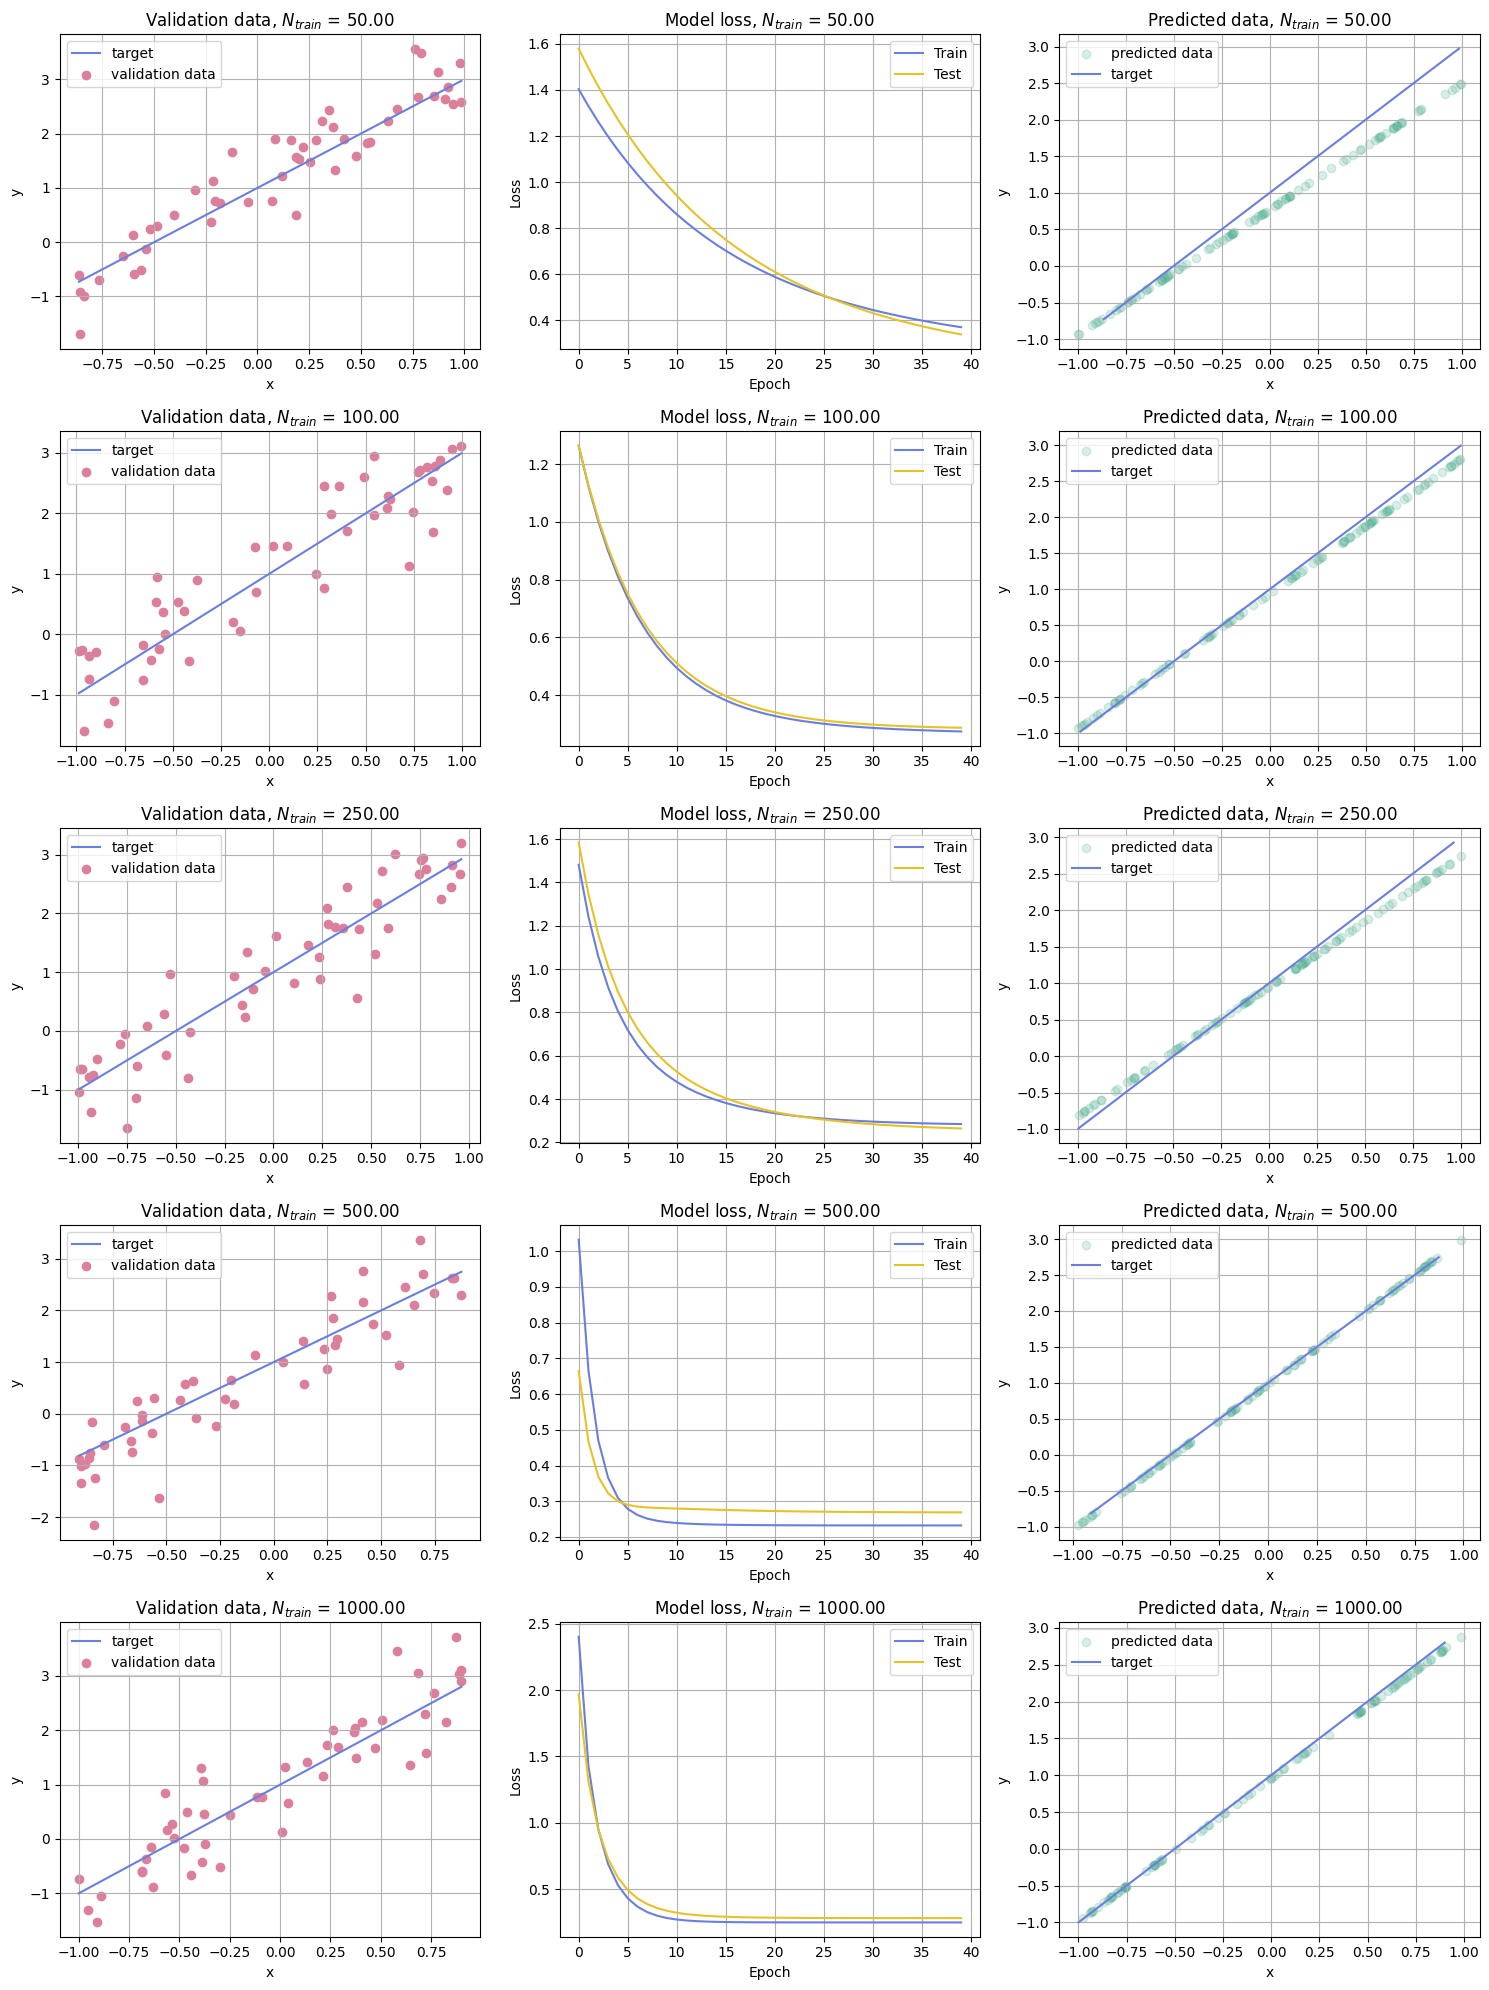

In [3]:
n_train_1 = [50, 100, 250, 500, 1000]
fig, ax = plt.subplots(5,3, figsize=(15,20))

for i in range(n_exp):
    
    n_epochs = 40
    n_train = n_train_1[i]
    sigma = 0.5

    # generate training inputs
    m = 2 # slope
    b = 1 # intersect
    x_train = np.random.uniform(-1, 1, n_train)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    # generate training imputs with different noise
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    # build the model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # train the model 
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=n_epochs,
        shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

    # evaluate model
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    # plotting data 
    ax[i,0].plot(x_valid, y_target, color='#6A7FDB', label='target')
    ax[i,0].scatter(x_valid, y_valid, color='#DC7F9B', label='validation data')
    ax[i,0].legend()
    ax[i,0].grid(True)
    ax[i,0].set_title(r'Validation data, $N_{train}$ = %.2f' % n_train)
    ax[i,0].set_xlabel('x')
    ax[i,0].set_ylabel('y')
                       
    ax[i,1].plot(history.history['loss'], color='#6A7FDB')
    ax[i,1].plot(history.history['val_loss'], color='#E6C229')
    ax[i,1].set_title(r'Model loss, $N_{train}$ = %.2f' % n_train)
    ax[i,1].set_ylabel('Loss')
    ax[i,1].set_xlabel('Epoch')
    ax[i,1].legend(['Train', 'Test'])
    ax[i,1].grid(True)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    ax[i,2].scatter(x_predicted, y_predicted,color='#43AA8B', alpha=0.2, label='predicted data')
    ax[i,2].plot(x_valid, y_target, color='#6A7FDB', label='target')
    ax[i,2].grid(True)
    ax[i,2].set_title(r'Predicted data, $N_{train}$ = %.2f' % n_train)
    ax[i,2].set_xlabel('x')
    ax[i,2].set_ylabel('y')
    ax[i,2].legend()


plt.tight_layout()
plt.show()

Finally, I report the plot associated of $\sigma$ parameter. These plots show that if the noise exceed a certain value, the NN isn't able to single out the function trend. 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2618e-04 - mse: 1.2618e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7912e-04 - mse: 4.7912e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - mse: 0.0020
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 - mse: 0.0019       
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053 - mse: 0.0053
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


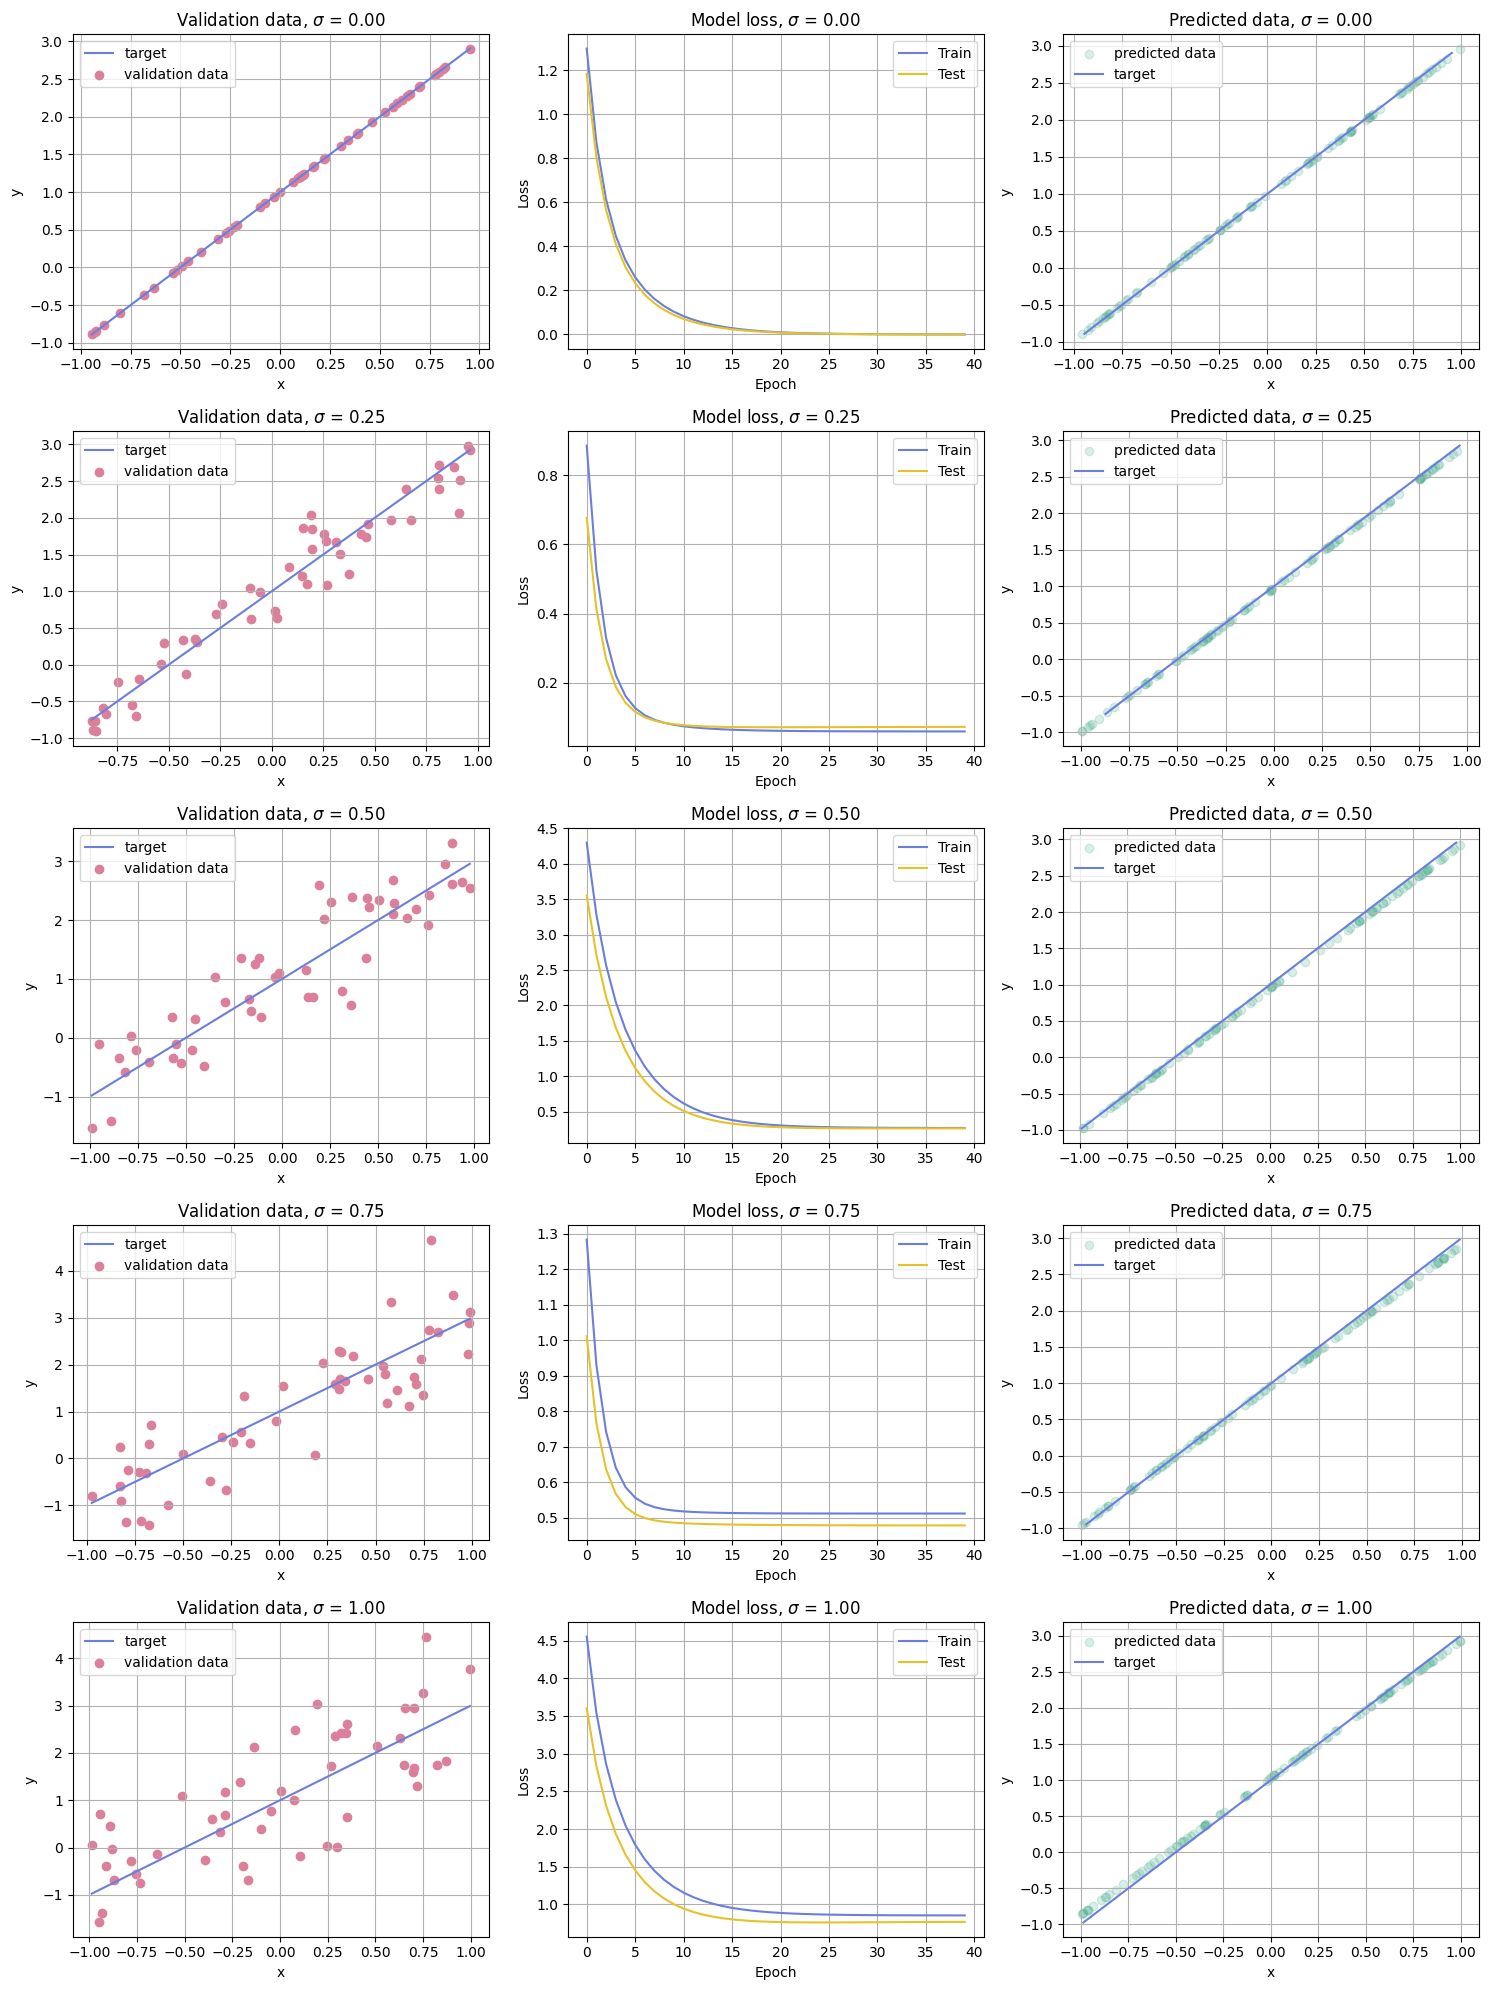

In [4]:
sig_1 = np.linspace(0.0, 1.0, n_exp) 
fig, ax = plt.subplots(5,3, figsize=(15,20))

for i in range(n_exp):
    
    epochs = 40
    n_train = 500
    sigma = sig_1[i]

    # generate training inputs
    m = 2 # slope
    b = 1 # intersect
    x_train = np.random.uniform(-1, 1, n_train)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    # generate training imputs with different noise
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    # build the model
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # train the model 
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40,
        shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

    # evaluate model
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    # plotting data 
    ax[i,0].plot(x_valid, y_target, color='#6A7FDB', label='target')
    ax[i,0].scatter(x_valid, y_valid, color='#DC7F9B', label='validation data')
    ax[i,0].legend()
    ax[i,0].grid(True)
    ax[i,0].set_title(r'Validation data, $\sigma$ = %.2f' % sigma)
    ax[i,0].set_xlabel('x')
    ax[i,0].set_ylabel('y')
                       
    ax[i,1].plot(history.history['loss'], color='#6A7FDB')
    ax[i,1].plot(history.history['val_loss'], color='#E6C229')
    ax[i,1].set_title(r'Model loss, $\sigma$ = %.2f' % sigma)
    ax[i,1].set_ylabel('Loss')
    ax[i,1].set_xlabel('Epoch')
    ax[i,1].legend(['Train', 'Test'])
    ax[i,1].grid(True)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    ax[i,2].scatter(x_predicted, y_predicted,color='#43AA8B', alpha=0.2, label='predicted data')
    ax[i,2].plot(x_valid, y_target, color='#6A7FDB', label='target')
    ax[i,2].grid(True)
    ax[i,2].set_title(r'Predicted data, $\sigma$ = %.2f' % sigma)
    ax[i,2].set_xlabel('x')
    ax[i,2].set_ylabel('y')
    ax[i,2].legend()


plt.tight_layout()
plt.show()

## 11.2

### Assignment

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Solution
In the next cell I generate the train and validation data. I used 1000 points to train the NN and 100 points to validate it. All the points are characterized by a Gaussian noisy of 0.2 sigma. I plot the polinomial trend and the validation point to visualize the discrepancy generated by the noise. 

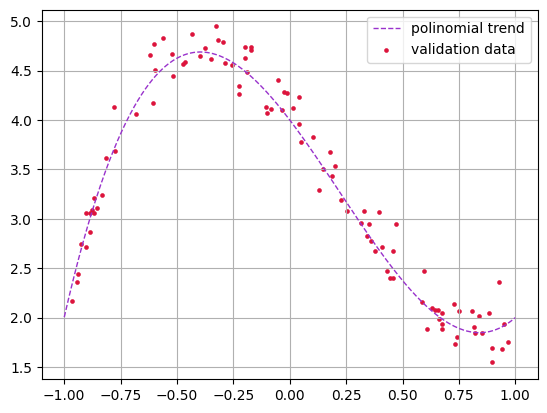

In [5]:
#define the function that I want to fit
def f_pol(x):
    a = 4 - 3*x - 2 * x**2 + 3 * x**3
    return a

#costruct the training and validation coordinates
x_t = np.random.uniform(-1, 1, 1000)
x_t.sort()
x_v = np.random.uniform(-1, 1, 100)
x_v.sort()
y_targ = f_pol(x_t)

sigma = 0.2
y_t = np.random.normal(f_pol(x_t), sigma) 
y_v = np.random.normal(f_pol(x_v), sigma)

#plotting the figure
plt.plot(x_t, y_targ, color='darkorchid', linestyle='--', linewidth=1, label='polinomial trend')
plt.scatter(x_v, y_v, color='crimson', marker='8', s=6, label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Now I costruct the neural network. The architecture of the network is reported in the summary printed in the cell.

In [20]:
#type of network
pol_model = tf.keras.Sequential()
#architecture of the model
pol_model.add(Dense(4, activation='relu', input_shape=(1,)))
pol_model.add(Dense(16, activation='relu'))
pol_model.add(Dense(64, activation='relu'))
pol_model.add(Dense(16, activation='relu'))
pol_model.add(Dense(4, activation='relu'))
pol_model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
pol_model.compile(optimizer='adamax', loss='mse', metrics=['mse']) 
pol_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,289 (8.94 KB)

 Trainable params: 2,289 (8.94 KB)

 Non-trainable params: 0 (0.00 B)

To train the NN I used 60 epochs. From the trend of the model loss, I observe that the NN learn all of what it can:

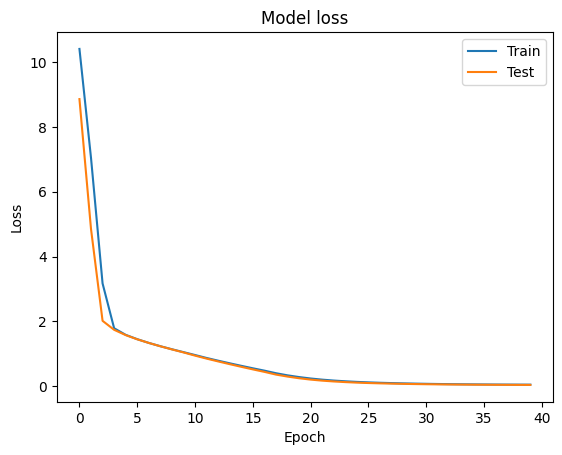

In [21]:
history = pol_model.fit(x=x_t, y=y_t, batch_size=30, epochs=40, shuffle=True, validation_data=(x_v, y_v), verbose=0)

# plotting data obtained
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

From this plot we clearly see that the neural network (NN points) is able to reproduce the trend of the function in the interval of the training points, but it can't reproduce it outside the interval. It's interesting to notice that the error of NN estimation is lower than the point noise, as we can see from the second plot.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Text(0.5, 1.0, 'Zoom in the interval of the training points $[-1,1]$')

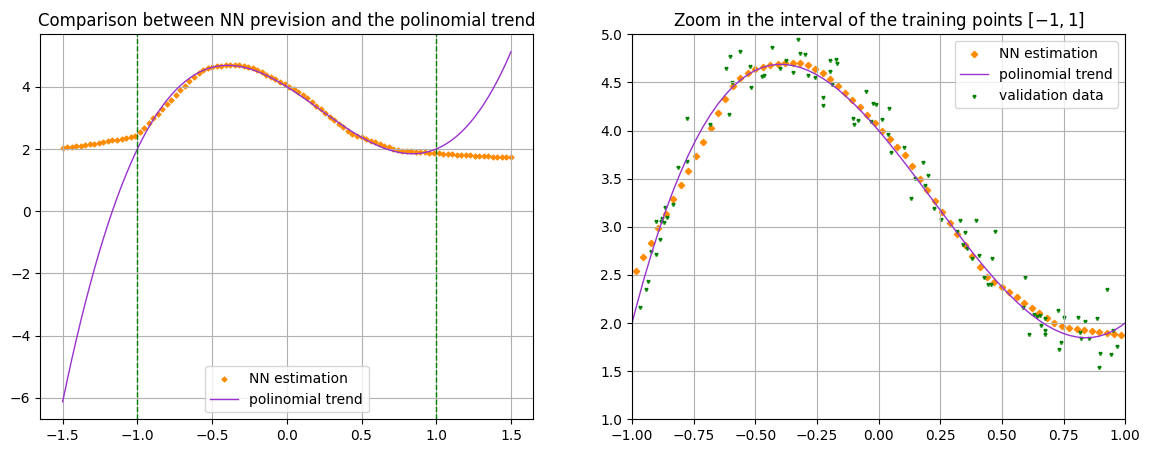

In [22]:
x_predicted = np.linspace(-1.5, 1.5, 100)
y_predicted = pol_model.predict(x_predicted)
y_pred_targ = f_pol(x_predicted)

fig, ax = plt.subplots(1, 2, figsize=(14, 5)) 

ax[0].scatter(x_predicted, y_predicted, color='darkorange', marker='D', s=6, label='NN estimation')
ax[0].plot(x_predicted, y_pred_targ, color='darkorchid', linewidth=1, label='polinomial trend')
ax[0].axvline(x=-1, color='green', linestyle='--', linewidth=1)  
ax[0].axvline(x=1, color='green', linestyle='--', linewidth=1)  
ax[0].grid(True)
ax[0].legend()
ax[0].set_title('Comparison between NN prevision and the polinomial trend')

ax[1].scatter(x_predicted, y_predicted, color='darkorange', marker='D', s=10, label='NN estimation')
ax[1].plot(x_predicted, y_pred_targ, color='darkorchid', linewidth=1, label='polinomial trend')
ax[1].scatter(x_v, y_v, color='green', marker='1', s=10, label='validation data')
ax[1].set_xlim(-1, 1)
ax[1].set_ylim(1, 5)
ax[1].grid(True)
ax[1].legend()
ax[1].set_title(r'Zoom in the interval of the training points $[-1,1]$')

#evaluation of the distance average fro the polinomial trend for the Nn model points and the validation points


## Exercise 11.3

### Assignment 
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

### Solution

For exercise 11.3 I repeat the same process of exercise 11.2 adapting the NN on the problem, for example in this case the input dataset is composed by 2-dimensional points. 

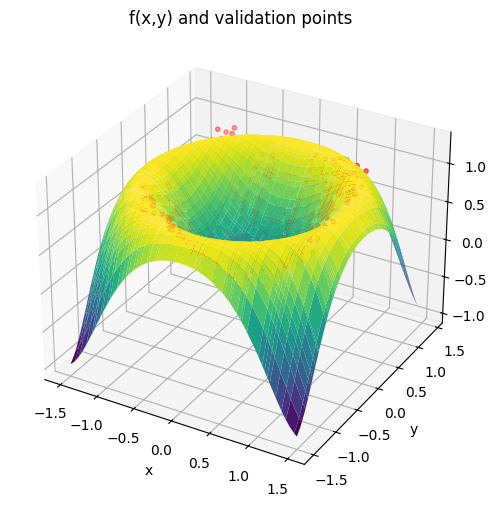

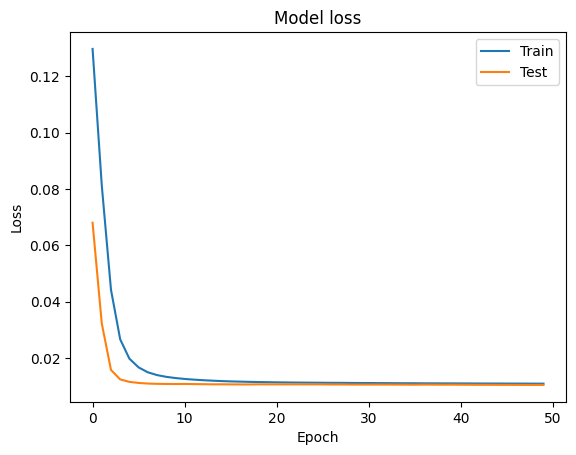

In [35]:
#define the function to fit
def f_sin(x, y):
    a = np.sin(x**2 + y**2)
    return a

#costruct the training and validation coordinates
#training points
x_t3 = np.random.uniform(-1.5, 1.5, 150)
x_t3.sort()
y_t3 = np.random.uniform(-1.5, 1.5, 150)
y_t3.sort()
XT3, YT3 = np.meshgrid(x_t3, y_t3)
Z3_targ = np.sin(XT3**2 + YT3**2)
#validation points
x_v3 = np.random.uniform(-1, 1, 30)
y_v3 = np.random.uniform(-1, 1, 30)
XV3, YV3 = np.meshgrid(x_v3, y_v3)

sigma = 0.1
ZT3 = np.random.normal(np.sin(XT3**2 + YT3**2), sigma) 
ZV3 = np.random.normal(np.sin(XV3**2 + YV3**2), sigma) 

#plotting the figure
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XT3, YT3, Z3_targ, cmap='viridis', label=r'$f(x,y)$')
ax.scatter(XV3, YV3, ZV3, color='red', s=10, label='validation points')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('f(x,y) and validation points')
ax.get_legend()
plt.show()

#type of network
sin_model = tf.keras.Sequential()
#architecture of the model
sin_model.add(Dense(4, activation='relu', input_shape=(2,)))
sin_model.add(Dense(16, activation='relu'))
sin_model.add(Dense(64, activation='relu'))
sin_model.add(Dense(16, activation='relu'))
sin_model.add(Dense(4, activation='relu'))
sin_model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
sin_model.compile(optimizer='adamax', loss='mse', metrics=['mse']) 

#adapting the data for the NN
X_train = np.column_stack((XT3.ravel(), YT3.ravel()))
y_train = ZT3.ravel()
X_val = np.column_stack((XV3.ravel(), YV3.ravel()))
y_val = ZV3.ravel()

#training the NN
history_3 = sin_model.fit(x=X_train, y=y_train, batch_size=30, epochs=50, shuffle=True, validation_data=(X_val, y_val), verbose=0)

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Here I report the function predicted with the fit and the difference with the real andament. I conclude that the NN is albe the reproduce the trend af $f(x,y)$ in the space of the training space, except that for some isolated points.   

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


Text(0.5, 0, 'z')

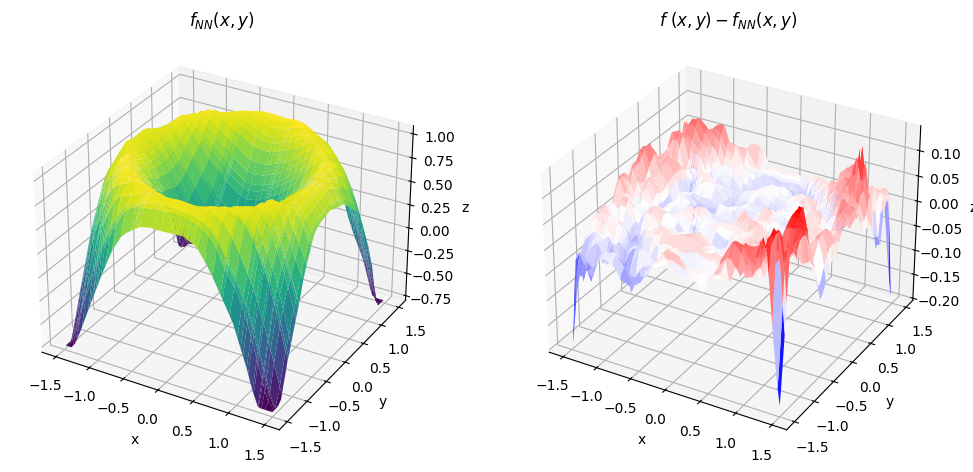

In [36]:
#generation of dataset with the NN model
x_p3 = np.random.uniform(-1.5, 1.5, 100)
x_p3.sort()
y_p3 = np.random.uniform(-1.5, 1.5, 100)
y_p3.sort()
XP3, YP3 = np.meshgrid(x_p3, y_p3)
XY_p = np.column_stack((XP3.ravel(), YP3.ravel()))

z_p3 = sin_model.predict(XY_p)
z_p3 = z_p3.reshape(XP3.shape)

z_p3_targ = np.sin(XP3**2 + YP3**2)
difference3 = (z_p3_targ-z_p3)

#plotting 
fig3 = plt.figure(figsize=(12, 12))

#plot of the model points trend
ax3_1 = fig3.add_subplot(1,2,1, projection='3d')
ax3_1.plot_surface(XP3, YP3, z_p3, cmap='viridis')
ax3_1.set_title(r'$f_{NN}(x,y)$')
ax3_1.set_xlabel('x')
ax3_1.set_ylabel('y')
ax3_1.set_zlabel('z')

#plot of the difference between model points and function 
ax3_2 = fig3.add_subplot(1,2,2, projection='3d')
surf2 = ax3_2.plot_surface(XP3, YP3, difference3, cmap='bwr')
ax3_2.set_title(r'$f \ (x,y) - f_{NN}(x,y)$')
ax3_2.set_xlabel('x')
ax3_2.set_ylabel('y')
ax3_2.set_zlabel('z')
